<a href="https://colab.research.google.com/github/mpolitano/redesNueronales/blob/master/Final2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/mnist')

Mounted at /mnist


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
from torch import nn
import pandas as pd
import torchvision.transforms as transforms



In [3]:
mnist_data = datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,),(0.3081,))]))

mnist_test = datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,),(0.3081,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



 conjunto de datos de entrenamiento
 

In [4]:
n_epochs = 15
input_shape = 28*28

batch_size = 1000

random_seed = 1
torch.manual_seed(random_seed)

learning_rate = 10
momentum = 0.5
log_interval = 10
# dropout = 0.1
# n_epochs=15

La squeeze elimina las capaz dummy. Como es blanco y negro, no necesitamos esta capa. Usamos una red fully conecty lineal.

Para el programa una imagen es en 3D pero no sotros queremos en 2D



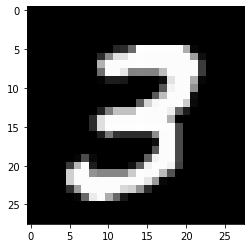

In [9]:
plt.imshow(mnist_data[7][0].numpy().squeeze(), cmap='gray')

imshow me permite graficar un array con forma de imagen
El dataset esta guardado como una lista de dos valores. El 0 es la imagen, el elemento 1 es la imagen

 conjunto de datos de test

NameError: ignored

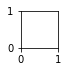

In [10]:
Nshowx = 10
Nshowy = 10
plt.figure(figsize=(8,8))
for i in range(1,Nshowx*Nshowy+1): 
    plt.subplot(Nshowx,Nshowy,i)
    plt.imshow(train_dataset.data[i-1], cmap='gray')
    plt.axis("off")
plt.savefig(os.path.join('ejemplos.pdf'), dpi=300)
plt.show()

In [5]:
# mnist_data = datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor()]))
transform = transforms.Compose([transforms.ToTensor()])

    # load the dataset
train_dataset = datasets.MNIST(
    root='./data', train=True,
    download=True, transform=transform,
)

test_dataset = datasets.MNIST(
    root='./data', train=True,
    download=True, transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, 
    shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=4
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [12]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [ ]:
class Squeeze(nn.Module):
    def forward(self, inpt):
        return inpt.view(inpt.size(0), -1)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 4, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # nn.Conv2d(16, 4, 3, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2,2),
            # nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2,stride=2),
            # nn.ReLU(),
            # nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            # nn.ReLU(),
            # nn.ConvTranspose2d(32, 1, 2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
import torch.nn.functional as F


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:', device)

Device: cpu


Optimizador es el descenso por el gradiente. Ver de usar Adam

In [8]:
# network = Autoencoder().to(device)
# optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

model = Autoencoder()
# optimizer = torch.optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5)


In [9]:
# Mean Squared Error Loss
criterion = nn.MSELoss()

In [ ]:
flatten = Flatten()

In [10]:
train_losses = []
train_loss_values = []
test_loss_values = []

train_counter = []
test_losses = []
log_interval = 10

test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


 

# **Nueva train **

Nueva test


In [36]:
for epoch in range(n_epochs):
    loss = 0
    for batch_features, _ in train_loader:

        # load it to the active device
        batch_features = batch_features.to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    avg_train_loss = loss / len(train_loader)

    train_loss_values.append(avg_train_loss)

    with torch.no_grad():
        loss = 0
        for batch_features, _ in test_loader:

            # load it to the active device
            batch_features = batch_features.to(device)
            
            # compute reconstructions
            outputs = model(batch_features)
            
            # compute testing reconstruction loss
            test_loss = criterion(outputs, batch_features)
                        
            # add the mini-batch testing loss to epoch loss
            loss += test_loss.item()
    
    # compute the epoch testing loss
    avg_test_loss = loss / len(test_loader)

    test_loss_values.append(avg_test_loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, train loss = {:.6f}, test loss = {:.6f}, ".format(
        epoch + 1, n_epochs, avg_train_loss, avg_test_loss)
    )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 2/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 3/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 4/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 5/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 6/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 7/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 8/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 9/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 10/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 11/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 12/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 13/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 14/15, train loss = 0.014180, test loss = 0.013985, 
epoch : 15/15, train loss = 0.014180, test loss = 0.013985, 


In [13]:
torch.save(model.state_dict(), str(hidden_layer_size))
np.savetxt(str(hidden_layer_size), np.array([train_loss_values, test_loss_values]).T)

NameError: ignored

In [ ]:
def compare(dataset, n=None):

  if not n:
    n = np.random.randint(dataset.data.size(0))
  inpt = dataset[n]
  print(inpt)
  original = inpt
  autoencoded = model(inpt)

  titles = ['Original', 'Reconstrucción']

  fig, axes = plt.subplots(ncols=2)

  for i, img in enumerate([original, autoencoded]):
    ax = axes[i]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titles[i])
    ax.imshow(img, cmap='gray')

compare(train_dataset)
compare(test_dataset)

In [20]:
input_shape = 28*28
hidden_layer_size = 64

train_batch_size = 1000
test_batch_size = 1000
learning_rate = 10
momentum = 0.5
log_interval = 10

random_seed = 1
torch.manual_seed(random_seed)
dropout = 0.1
n_epochs=15

In [24]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Squeeze(nn.Module):
    def forward(self, inpt):
        return inpt.view(inpt.size(0), 1, 28, 28)

In [25]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        # self.autoenc = nn.Sequential()
        self.enco = nn.Linear(input_shape, hidden_layer_size)
        self.deco = nn.Linear(hidden_layer_size, input_shape)

        # self.autoenc.add_module('enc',self.enco)
        # self.autoenc.add_module('dec',self.deco)

        self.relu = nn.ReLU()
        self.flatten = Flatten()
        self.squeeze = Squeeze()
        self.dropout = nn.Dropout(dropout)

        
    def forward(self, x):
          # def forward(self, x):
        # pred = F.relu(self.enco(x))
        # pred = F.relu(self.deco(pred))
        # return pred
        x = self.flatten(x)
        x = self.enco(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.deco(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.squeeze(x)
        return x

In [26]:
network = autoencoder().to(device)
optimizer = torch.optim.Adam(network.parameters(), weight_decay=1e-5)

In [27]:
# Mean Squared Error Loss
criterion = nn.MSELoss()

In [28]:
flatten = Flatten()

In [29]:
train_loss_values_old = []
test_loss_values_old  = []

In [30]:


for epoch in range(n_epochs):
    loss = 0
    for batch_features, _ in train_loader:

        # load it to the active device
        batch_features = batch_features.to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = network(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    avg_train_loss = loss / len(train_loader)

    train_loss_values_old.append(avg_train_loss)

    with torch.no_grad():
        loss = 0
        for batch_features, _ in test_loader:

            # load it to the active device
            batch_features = batch_features.to(device)
            
            # compute reconstructions
            outputs = network(batch_features)
            
            # compute testing reconstruction loss
            test_loss = criterion(outputs, batch_features)
                        
            # add the mini-batch testing loss to epoch loss
            loss += test_loss.item()
    
    # compute the epoch testing loss
    avg_test_loss = loss / len(test_loader)

    test_loss_values_old.append(avg_test_loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, train loss = {:.6f}, test loss = {:.6f}, ".format(
        epoch + 1, n_epochs, avg_train_loss, avg_test_loss)
    )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1/15, train loss = 0.071350, test loss = 0.054085, 
epoch : 2/15, train loss = 0.047073, test loss = 0.041597, 
epoch : 3/15, train loss = 0.038460, test loss = 0.036055, 
epoch : 4/15, train loss = 0.034628, test loss = 0.033330, 
epoch : 5/15, train loss = 0.032295, test loss = 0.031477, 
epoch : 6/15, train loss = 0.030781, test loss = 0.030244, 
epoch : 7/15, train loss = 0.029907, test loss = 0.029603, 
epoch : 8/15, train loss = 0.029358, test loss = 0.029164, 
epoch : 9/15, train loss = 0.029058, test loss = 0.028877, 
epoch : 10/15, train loss = 0.028788, test loss = 0.028724, 
epoch : 11/15, train loss = 0.028623, test loss = 0.028486, 
epoch : 12/15, train loss = 0.028451, test loss = 0.028376, 
epoch : 13/15, train loss = 0.028232, test loss = 0.028121, 
epoch : 14/15, train loss = 0.027942, test loss = 0.027777, 
epoch : 15/15, train loss = 0.027682, test loss = 0.027557, 


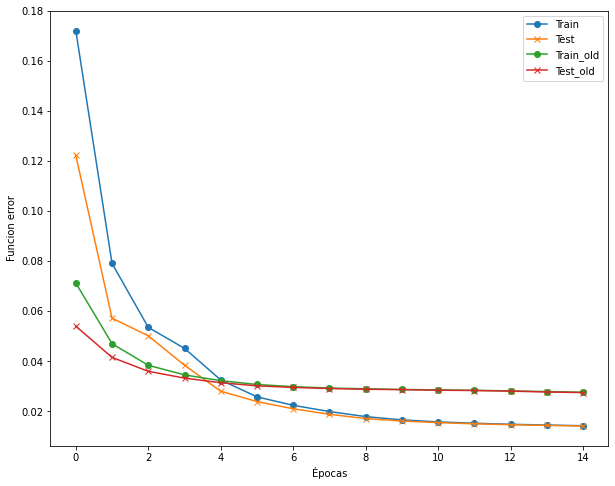

In [31]:
epochs = np.arange(len(train_loss_values))

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel('Funcion error')
ax.set_xlabel('Épocas')

ax.plot(epochs, np.array(train_loss_values), 'o-', label='Train')
ax.plot(epochs, np.array(test_loss_values), 'x-', label='Test')
ax.plot(epochs, np.array(train_loss_values_old), 'o-', label='Train_old')
ax.plot(epochs, np.array(test_loss_values_old), 'x-', label='Test_old')

ax.legend()

plt.savefig( "Train-vs-test.png")

plt.show()

In [37]:
test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False
)

test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.view(-1, 784)
        reconstruction = model(test_examples)
        break

RuntimeError: ignored

In [ ]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
dir_name = '/content/gdrive/My Drive/Colab Notebooks/pytorch/Autoencoder_MNIST_files'
base_model_name = 'hidden{:04}_dropout{:.3f}_batch{:05}_lr{:.6f}_momentum{:.6f}'.format(
    hidden_layer_size, dropout, train_batch_size, learning_rate, momentum
)
model_name = base_model_name + '.pt'
loss_name  = base_model_name + '.txt'

print(model_name)
model_path = os.path.join(dir_name, 'models', model_name)
loss_path = os.path.join(dir_name, 'loss', loss_name)


In [ ]:
train_loss_dict = {}
test_loss_dict = {}

hidden_values = [64,128,256,512]

for hidden in hidden_values:

    inpt_file_name = 'hidden{:04}_dropout{:.3f}_batch{:05}_lr{:.6f}_momentum{:.6f}'.format(
        hidden, dropout, train_batch_size, learning_rate, momentum
    )
    train_loss, test_loss = np.loadtxt(str(hidden)).T

    train_loss_dict[hidden] = train_loss
    test_loss_dict[hidden] = test_loss

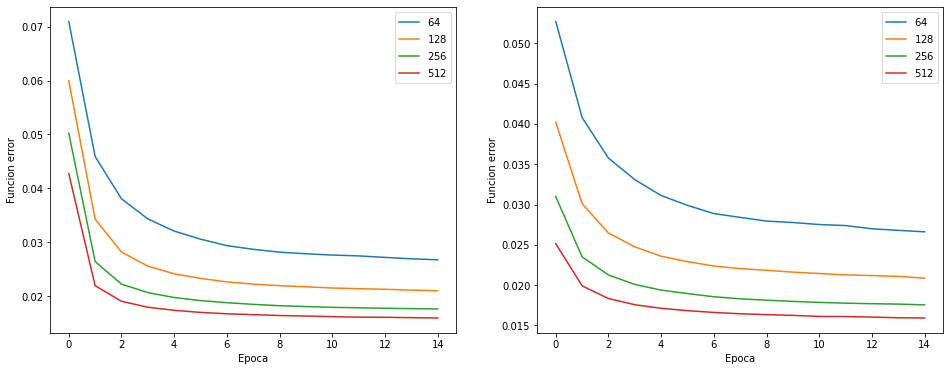

In [ ]:

ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for hidden in hidden_values:
    train_loss, test_loss = train_loss_dict[hidden], test_loss_dict[hidden]
    for i, loss_values in enumerate([train_loss, test_loss]):
        ax = axes[i]
        epochs = np.arange(train_loss.shape[0])
        ax.plot(epochs, loss_values, label=r'${{{}}}$'.format(hidden))

for ax in axes:
    ax.set_ylabel('Funcion error')
    ax.set_xlabel('Epoca')
    ax.legend()

plt.show()

Ejemplo de la clase:
